## Linear Regression Implementation 

## Imports

In [285]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#in order to see these visualizations in our notebook environment, I need to specify with
%matplotlib inline

from sklearn.datasets import load_boston

## Loading In the Boston House Prices Dataset

In [286]:
boston = load_boston()

C:\Users\pwayk\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this case special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets includ

In [287]:
#what this boston variable is, is that it's a dictionary 
#to briefly summarize, a dictionary is a data structure that contains key-value pairs, and what these keys do is they unlock certain aspects of our dictionary dataset, and I'll show you what that means as I go through the walkthrough
#the keys for this dictionary to our dataset can be seen by passing in:
boston.keys()
#basically, whenever you have a dictionary and want a list of all it's keys, we can do that with the .keys() function 

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [288]:
#now that we have that out of the way, let's actually use one of the keys, the description key, to get a better sense of all the characteristics, attributes, and features in our dataset 
print(boston.DESCR)


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [289]:
print(boston.target) #Target is what it that is to be prdicted here it is Price

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [290]:
df_boston = pd.DataFrame(boston.data, columns = boston.feature_names)

In [291]:
#allows you to see the first 5 data points of your dataframe
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [292]:
df_boston['house_prices'] = boston.target #Adding a new Coloumn to the datase
#the new coloumn is the price of that particular house which here in this dataset is stored in the form of boston.taget #target is what our goal is to find it is (HERE)

In [293]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,house_prices
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Statistics, Visualizations, EDA

In [294]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CRIM          506 non-null    float64
 1   ZN            506 non-null    float64
 2   INDUS         506 non-null    float64
 3   CHAS          506 non-null    float64
 4   NOX           506 non-null    float64
 5   RM            506 non-null    float64
 6   AGE           506 non-null    float64
 7   DIS           506 non-null    float64
 8   RAD           506 non-null    float64
 9   TAX           506 non-null    float64
 10  PTRATIO       506 non-null    float64
 11  B             506 non-null    float64
 12  LSTAT         506 non-null    float64
 13  house_prices  506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [295]:
#quick account of statistical information of your dataframe
df_boston.describe() #this one is different from the boston.DESCR function that we applied earlier

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,house_prices
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [296]:
#allows you to see all the features and the target 
df_boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'house_prices'],
      dtype='object')

In [297]:
#The first visualization, that I won't actually run, is the pairplot from seaborn --> it creates histograms and correlation scatter plots, which allows you to see how different columns are correlated with each other
# sns.pairplot(df_boston)
#For the sake of time, I won't run this function because it may take a while for all the plots to load in since we have so many features in our data, you can try it out if you are interested in seeing how it looks and works, but I 
#wouldn't recommend it for large datasets like these. 
# This is because for larger datasets with a lot of features, it may take a while for it to run and since there will be so many plots and histograms as the output, it'll be fairly difficult
# to actually interpret them and make any sense of the data because the outputted plots will be very small
#But, if you do use a smaller dataset for a different use case, then this pairplot can be a great tool 

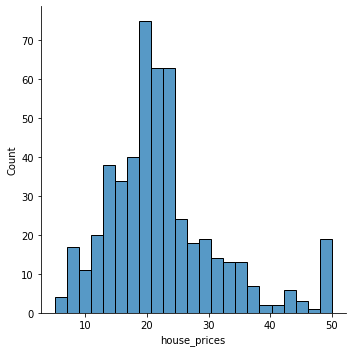

In [298]:
#generally, you want to check the distribution of your target column (what we're trying to predict, and here we're trying to predict the price of the house), and we can do that using:
sns.displot(df_boston['house_prices'])
#looks like the average price is falling somewhere around the $15,000 to $20,000 price point 
#the data looks somewhat normally distributed in some areas, generally it's good to have your targets be normally distributed but that won't always be the case 

In [299]:
#another interesting visualization that you may want to do with your dataset is to create a heatmap of the correlation between all the columns 
#let's start by actually making matrix of the correlation values between our features, and we can do this by saying 
#this matrix shows you correlation between all of the columns 
df_boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,house_prices
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot:>

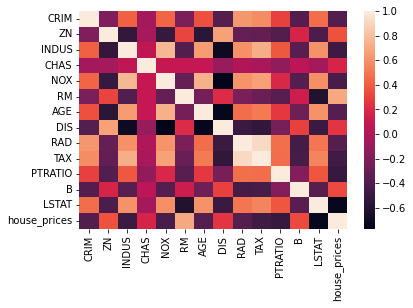

In [300]:
#we can then plot out these correlations using the heatmap, let's do this with:
sns.heatmap(df_boston.corr())
#here we can see a diagonal of full correlation, and this makes sense since every column should be completely correlated with itself 
#we can also see information and correlations between different columns as well

In [301]:
#now that we've gone over some basic EDA and visualizations, let's get starting with the model training process. We'll first need to split our data into X and y arrays, and I'll show you what that means in sec
#before we do that, let's just to get a quick recap on all of our columns, we can grab the column names by passing in: 
df_boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'house_prices'],
      dtype='object')

In [302]:
#Now let's get to splitting our data into X and y arrays: the X array will only contain the feature columns (or the independent variables) that the model will train on,
#and the y array will contain the target variable that the model will try to predict --> our house_prices column 
X = df_boston.drop('house_prices', axis = 1) #axis = 1 means column wise
y = df_boston['house_prices'] #putting only the prices here

## Model Training


In [303]:
#now that we have our features and target data split and set up, let's shift to using scikitlearn to actually train our linear regression model 
#the first thing want to do is perform a train_test_split on our data
#we want to split our data into a training set to train and allow our model to learn from the data, and a test set to evaluate or validate our model once it's been trained 
from sklearn.model_selection import train_test_split

In [304]:
#with the train_test_split function, what we're essentially going to do is we're going to pass in our X and y data, and then we'll specify a test size
#test_size = 0.4 is essentially saying that we want 40% of our data to be allocated to evaluating or testing our model
#that means we want 60% of our data to be allocated for training our model
#you can also do 0.3, 0.2 (those percentages are also commonly used), but it's pretty much up to you on how much data you want to train your model with and how much you want to test the model with, and you can play around with that 

#the random state parameter is optional
#what random state is doing is it essentially ensures a specific set of random splits on your data --> because train test split occurs randomly
#in order to make sure that your random split is the same as my random split, set it to 101
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)
#Random state is setting a seed, so that it will take same random elements for anyone who uses this code

In [305]:
from sklearn.linear_model import LinearRegression
#The Most IMPORTANT IMPORT

In [306]:
#now we want to instantiate an instance of the LinearRegression model --> we're basically creating a LinearRegression object
model = LinearRegression()

In [307]:
#using the fit function to train or fit the linear regression model on the training data 
model.fit(X_train,y_train)
#notice that we are getting an output that tells us that the linear regression model has been trained 

LinearRegression()

In [308]:
#now that we've finished training the model, let's evaluate it by checking its coefficients and seeing how we can interpret them 
print(model.intercept_)

41.281496544738026


In [309]:
#we can grab our coefficient values for each feature by saying:
model.coef_

array([-7.75583711e-02,  4.20310157e-02,  9.11529473e-02,  4.13304932e+00,
       -1.99765575e+01,  2.89019042e+00,  1.61533256e-02, -1.26474745e+00,
        2.60170760e-01, -1.11251993e-02, -8.80555502e-01,  7.02445445e-03,
       -6.43482813e-01])

In [310]:
#So when we are creating a dataframe for coefficients: we're passing in coeffcients as the data and our feature columns as the indexes. We'll do this by saying: 
cdf = pd.DataFrame(model.coef_, X.columns, columns = ['Coeff'] )
#let's see how this looks like 

In [311]:
cdf
#This is how we can interpret the coefficients, I'll do this with an example: let's look at the 
#basically, if we hold all other features fixed/constant, a one unit increase in ZN is associated with an increase of 0.04 in the price (40 dollar increase in price)
#and that concludes this first part of the Python Linear Regression implementation. In the next video, we'll go over how to make predictions with our Linear Regression model and evaluate them. 
#Thanks for watching, and I'll see you then 

,Coeff
CRIM,-0.077558
ZN,0.042031
INDUS,0.091153
CHAS,4.133049
NOX,-19.976557
RM,2.890190
AGE,0.016153
DIS,-1.264747
RAD,0.260171
TAX,-0.011125


## Making Predictions

In [312]:
#The first thing we're going to do is grab predictions from our test feature set, and so we'll need X_test do to this. 
#Just to clarify and review from last time, X_train was used to train and fit our model to our features.
#With X_test, we'll be passing in feature data that the model has never seen before, and we're asking the model to make predictions based on these features (remember that X_test that contains just the feature columns)
#We can obtain our model's predictions by passing in:
predictions = model.predict(X_test)

In [313]:
#let's now see what our predictions look like by just passing in:
predictions
#As we can see, this is an array of all the house price predictions that are made by our model. These numbers are the predicted prices of the houses based on the features. 

array([38.76995104, 27.39271318, 16.26805601, 16.64592872, 30.5945708 ,
       31.37975753, 37.68282481,  7.57986744, 33.62371472,  6.94206736,
       30.00015138, 13.74184077, 16.41357803, 17.5975484 , 24.92452314,
       20.61277162,  6.84027833, 32.74459645, 28.14176473, 24.87051184,
       12.01460369, 19.89597528, 22.93223855, 24.84808083, 33.41944923,
       18.2663553 , 32.40616206, 19.07263109, 27.85446156, 33.36724349,
       20.31071184, 18.71427039, 36.3942392 , 43.97914411, 28.53636198,
       22.23810379, 15.23341286, 18.4441601 ,  2.99896469, 30.75373687,
       23.98495287, 17.65233987, 33.49269972, 13.72450288, 17.45026475,
       25.3864821 , 29.9370352 , 16.43822597, 27.0157306 , 23.23886475,
       31.8958797 , 36.8917952 , 22.96758436, 18.06656811, 30.34602124,
       -0.30828515, 19.8446382 , 16.6131071 , 23.63902347, 21.26225918,
       29.69766593,  3.14282554, 16.86387632, 19.76329036,  9.71050797,
       24.21870511, 24.27695942, 19.87071765, 17.16247142, 19.85

In [314]:
#however, we do know that the actual, correct prices of the houses is in the y_test set, which contains the target data column. We can see it by saying:
y_test


195    50.0
4      36.2
434    11.7
458    14.9
39     30.8
       ... 
78     21.2
160    27.0
124    18.8
167    23.8
272    24.4
Name: house_prices, Length: 203, dtype: float64

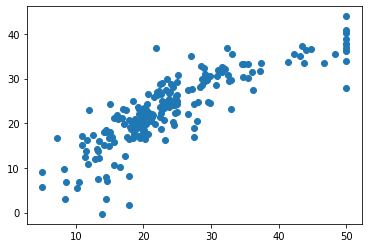

In [315]:
#a quick visual analysis of this is a matplotlib scatter plot. 
#As a quick review, a scatter plot graphs parits of numerical data, with one variable on each axis, in order to look for a relationship between them.4
#If the variables are correlated, the points will fall along a line, and the better the correlation, the tighter the points will hug this line
#In our case, we'll be passing in y_test and predictions to compare the predicted house prices and the actual house prices 
#If the scatter plot lines up fairly straight, that means our model did a fairly good job. 
#but of course if your scatter plot produces a perfect line, that means your predictions perfectly match your actual values, so a little bit off isn't too bad
#let's create the plot by saying
plt.scatter(y_test, predictions)
#In our case, we can see that for the most part, the model did fairly well with the more common house prices as that imaginary line seems to be more tighter there
#However, the model seems to have had a little more trouble with predictions for house prices with higher values. 

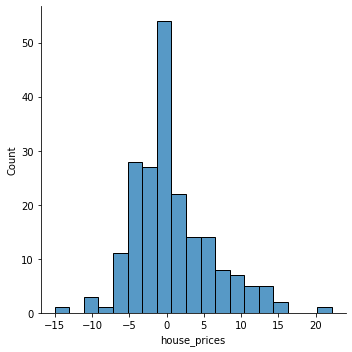

In [316]:
#let's now create another visualization, and this will be a histogram for the distribution of the residuals, we can do this by saying: 
sns.displot((y_test - predictions))
#remember that the residuals are just the difference between the actual values (which is y_test) and the predicted values (which is predictions array)
#here we can see a histogram of our residuals, and it is somewhat normally distributed, so our model didn't perform too bad with it's predictions, but maybe a different regression model may be better suited for our dataset 

In [317]:
#let's now move on to our final topic, which is regression evaluation metrics 
#let's first start off with the import, which is: 
from sklearn import metrics

In [318]:
#to give a brief summary about regression evaluation metrics:
#regression evaluation metrics are just variations of the difference between the actual true values and the predicted values (basically, they're just maniplulations of this difference)

#the three most common evaluation metrics for regression problems are mean absolute error or MAE (which is the mean of the absolute value of the error/residual), mean squared error (which is the mean of the squared error), 
#and root mean squared error (which is the square root of the mean of the squared errors)


In [319]:
#let's start of with MAE: MAE is basically just the average error. We can obtain it by passing in our y_test and predictions array into the mean absolute error function. Let's do this by saying:
metrics.mean_absolute_error(y_test, predictions)
#there you go, that's the mean absolute error

3.9051448026275084

In [320]:
#MSE, on the other hand, is more popular than MAE because MSE punishes larger errors (this is because it takes larger errors into account because it's squaring the errors)
#this is usually more applicable and useful for real-world applications where we want to prevent large errors as much as possible
#We can obtain the MSE similarly to the MAE by passing in:
metrics.mean_squared_error(y_test, predictions)

29.416365467452838

In [321]:
#RMSE is also really popular because you can directly interpret it with your target variable
#We can obtain the RMSE by passing in:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

5.423685598138302

In [322]:
#ultimately, all these regression evaluation metrics are loss funtion bcause we want to minize them as much as possible to optimize our model's performance 

#and that is the end of this video! Congratulations on your first real-world implementation of linear regression. I hope you were able to learn and get a lot out of these lectures, and I wish you good luck in your ML journey. 

In [324]:
# metrics.confusion_matrix(,y_test, predictions)
# Not apllicable in Case of regression because there are mo rigid values